<a href="https://colab.research.google.com/github/DonguYang/Data-Analysis/blob/circleci-project-setup/ROAS%EB%A1%9C%EC%A7%81%EC%A0%84%EC%9A%A9%EC%A0%84%ED%9B%84%EB%B9%84%EA%B5%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
df = pd.read_csv('1130_0110.csv', encoding = 'cp949')

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,STATS_DTTM,STATS_HH,WEEKDAY,PLTFOM_TP_CODE,ADVRTS_TP_CODE,ADVER_ID,CTGR_NM,PAR_EPRS_CNT,CLICK_CNT,ADVRTS_AMT,ORDER_AMT,ORDER_CNT
0,20231130.0,0.0,평일,1.0,16.0,banul,패션,2.0,0.0,0.0,0.0,0.0
1,20231130.0,0.0,평일,1.0,16.0,joje,생활,1.0,0.0,0.0,0.0,0.0
2,20231130.0,0.0,평일,1.0,16.0,jstyle07,패션,1.0,0.0,0.0,0.0,0.0
3,20231130.0,0.0,평일,1.0,16.0,medicube,건강,38.0,0.0,0.0,0.0,0.0
4,20231130.0,0.0,평일,1.0,16.0,stco123,패션,198.0,1.0,162.0,0.0,0.0


In [ ]:
before = df[df['STATS_DTTM'] <= 20231220]
after = df[df['STATS_DTTM'] > 20231220]

In [ ]:
after = after[after['STATS_DTTM'] <= 20240110]

In [ ]:
before_hh = before.groupby('STATS_HH')[['PAR_EPRS_CNT', 'CLICK_CNT', 'ADVRTS_AMT',
       'ORDER_AMT', 'ORDER_CNT']].sum().reset_index()
after_hh = after.groupby('STATS_HH')[['PAR_EPRS_CNT', 'CLICK_CNT', 'ADVRTS_AMT',
       'ORDER_AMT', 'ORDER_CNT']].sum().reset_index()

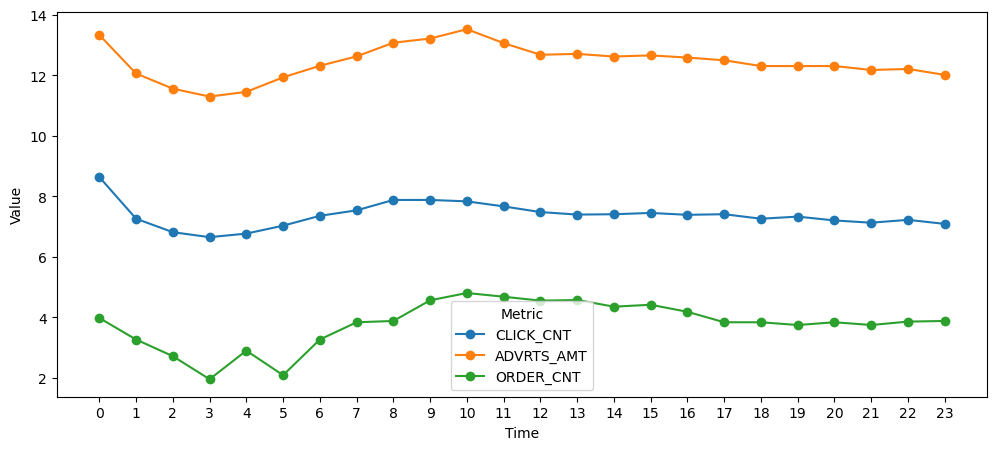

In [ ]:


# 스케일링
before_hh['CLICK_CNT_log'] = np.log1p(before_hh['CLICK_CNT'])
before_hh['ADVRTS_AMT_log'] = np.log1p(before_hh['ADVRTS_AMT'])
before_hh['ORDER_CNT_log'] = np.log1p(before_hh['ORDER_CNT'])

plt.figure(figsize=(12,5))

plt.plot(before_hh['STATS_HH'], before_hh['CLICK_CNT_log'], label='CLICK_CNT', marker='o')
plt.plot(before_hh['STATS_HH'], before_hh['ADVRTS_AMT_log'], label='ADVRTS_AMT', marker='o')
plt.plot(before_hh['STATS_HH'], before_hh['ORDER_CNT_log'], label='ORDER_CNT', marker='o')

plt.xticks(np.arange(24))

plt.xlabel('Time')
plt.ylabel('Value')

plt.legend(title='Metric')
plt.show()


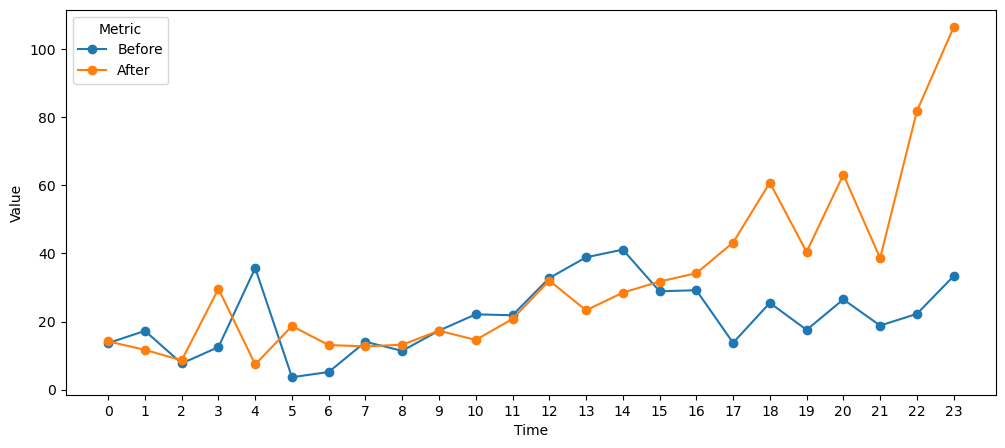

In [ ]:


# 스케일링
after_hh['roas'] = after_hh['ORDER_AMT']/after_hh['ADVRTS_AMT']
before_hh['roas'] = before_hh['ORDER_AMT']/before_hh['ADVRTS_AMT']


plt.figure(figsize=(12,5))

plt.plot(before_hh['STATS_HH'], before_hh['roas'], label='Before', marker='o')
plt.plot(after_hh['STATS_HH'], after_hh['roas'], label='After', marker='o')

plt.xticks(np.arange(24))

plt.xlabel('Time')
plt.ylabel('Value')

plt.legend(title='Metric')
plt.show()


In [ ]:
after_hh['ORDER_RATIO'] = after_hh['ORDER_CNT']/after_hh['ORDER_CNT'].sum()
before_hh['ORDER_RATIO'] = before_hh['ORDER_CNT']/before_hh['ORDER_CNT'].sum()

after_hh['ORDER_RATIO_bin'] = pd.cut(after_hh['ORDER_RATIO'], bins=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
before_hh['ORDER_RATIO_bin'] = pd.cut(before_hh['ORDER_RATIO'], bins=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

# 각 등급에 대한 가중치 계산
weight_dict = {'Q1': 0.5, 'Q2': 0.75, 'Q3': 1, 'Q4': 1.25, 'Q5': 1.25}
after_hh['ORDER_RATIO_weight'] = after_hh['ORDER_RATIO_bin'].map(weight_dict)
before_hh['ORDER_RATIO_weight'] = before_hh['ORDER_RATIO_bin'].map(weight_dict)

# 가중치를 곱한 roas 계산
after_hh['roas_weighted'] = (after_hh['ORDER_AMT'] / after_hh['ADVRTS_AMT']) * after_hh['ORDER_RATIO_weight']
before_hh['roas_weighted'] = (before_hh['ORDER_AMT'] / before_hh['ADVRTS_AMT']) * before_hh['ORDER_RATIO_weight']

In [ ]:
after_hh['ORDER_RATIO'] = after_hh['ORDER_CNT']/after_hh['ORDER_CNT'].sum()
before_hh['ORDER_RATIO'] = before_hh['ORDER_CNT']/before_hh['ORDER_CNT'].sum()

after_hh['ORDER_RATIO_bin'] = pd.cut(after_hh['ORDER_RATIO'], bins=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
before_hh['ORDER_RATIO_bin'] = pd.cut(before_hh['ORDER_RATIO'], bins=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

# 각 등급에 대한 가중치 계산
weight_dict = {'Q1': 0.5, 'Q2': 0.75, 'Q3': 1, 'Q4': 1.25, 'Q5': 1.25}
after_hh['ORDER_RATIO_weight'] = after_hh['ORDER_RATIO_bin'].map(weight_dict)
before_hh['ORDER_RATIO_weight'] = before_hh['ORDER_RATIO_bin'].map(weight_dict)

# 가중치를 곱한 roas 계산
after_hh['roas_weighted'] = (after_hh['ORDER_AMT'] / after_hh['ADVRTS_AMT']) * after_hh['ORDER_RATIO_weight']
before_hh['roas_weighted'] = (before_hh['ORDER_AMT'] / before_hh['ADVRTS_AMT']) * before_hh['ORDER_RATIO_weight']

In [ ]:
before_hh.head()

,STATS_HH,PAR_EPRS_CNT,CLICK_CNT,ADVRTS_AMT,ORDER_AMT,ORDER_CNT,CLICK_CNT_log,ADVRTS_AMT_log,ORDER_CNT_log,roas,ORDER_RATIO,ORDER_RATIO_bin,ORDER_RATIO_weight,roas_weighted
0,0.0,333481.0,5596.0,612088.28,8372636.0,52.0,8.629986,13.324633,3.970292,13.678805,0.040720,Q3,1.0,13.678805
1,1.0,152347.0,1409.0,171233.55,2957310.0,25.0,7.251345,12.050790,3.258097,17.270622,0.019577,Q1,0.5,8.635311
2,2.0,92208.0,902.0,103719.32,800070.0,14.0,6.805723,11.549453,2.708050,7.713799,0.010963,Q1,0.5,3.856900
3,3.0,70995.0,765.0,79896.05,999500.0,6.0,6.641182,11.288494,1.945910,12.510005,0.004699,Q1,0.5,6.255003
4,4.0,65956.0,861.0,93408.92,3336000.0,17.0,6.759255,11.444753,2.890372,35.713934,0.013312,Q1,0.5,17.856967


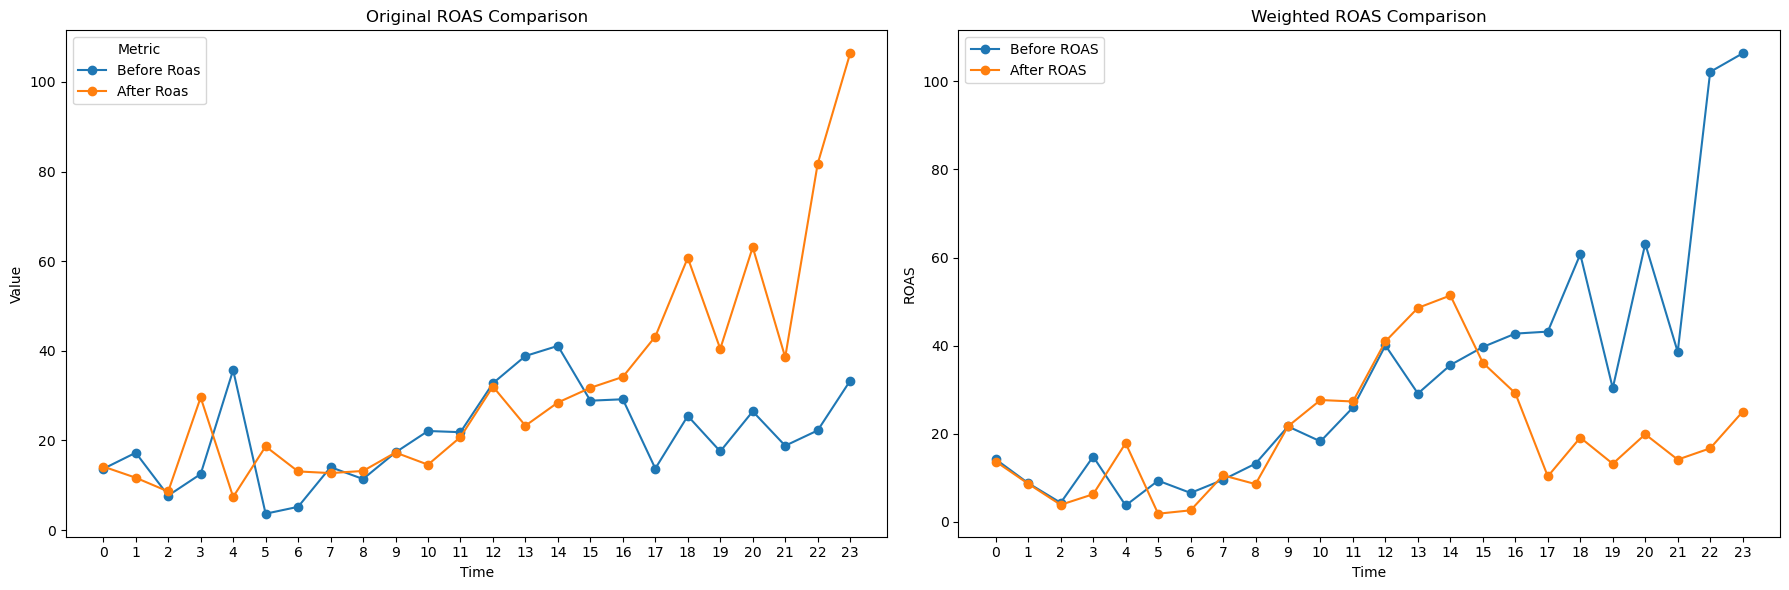

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Before 그림
axs[0].plot(before_hh['STATS_HH'], before_hh['roas'], label='Before Roas', marker='o')
axs[0].plot(after_hh['STATS_HH'], after_hh['roas'], label='After Roas', marker='o')
axs[0].set_xticks(np.arange(24))
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Value')
axs[0].legend(title='Metric')
axs[0].set_title('Original ROAS Comparison')

# After 그림
axs[1].plot(after_hh['STATS_HH'], after_hh['roas_weighted'], label='Before ROAS', marker='o')
axs[1].plot(before_hh['STATS_HH'], before_hh['roas_weighted'], label='After ROAS', marker='o')
axs[1].set_xticks(np.arange(24))
axs[1].set_xlabel('Time')
axs[1].set_ylabel('ROAS')
axs[1].legend()
axs[1].set_title('Weighted ROAS Comparison')

# 그림 간 간격 조절
plt.tight_layout()

# 그림 표시
plt.show()

In [ ]:
before_cpc = before_hh['ADVRTS_AMT'] / before_hh['CLICK_CNT']
after_cpc = after_hh['ADVRTS_AMT'] / after_hh['CLICK_CNT']

after_hh['ADVRTS_AMT2'] = after_hh['CLICK_CNT'] * before_cpc

In [ ]:
after_hh[['ADVRTS_AMT2', 'ADVRTS_AMT']]

,ADVRTS_AMT2,ADVRTS_AMT
0,9.167105e+05,488456.02
1,4.274155e+05,260218.94
2,2.016892e+05,117254.48
3,1.574944e+05,83204.30
4,1.521014e+05,71692.05
5,2.288770e+05,105684.85
6,3.642714e+05,166949.52
7,4.396982e+05,249488.23
8,6.649556e+05,407867.38
9,8.042820e+05,556535.67


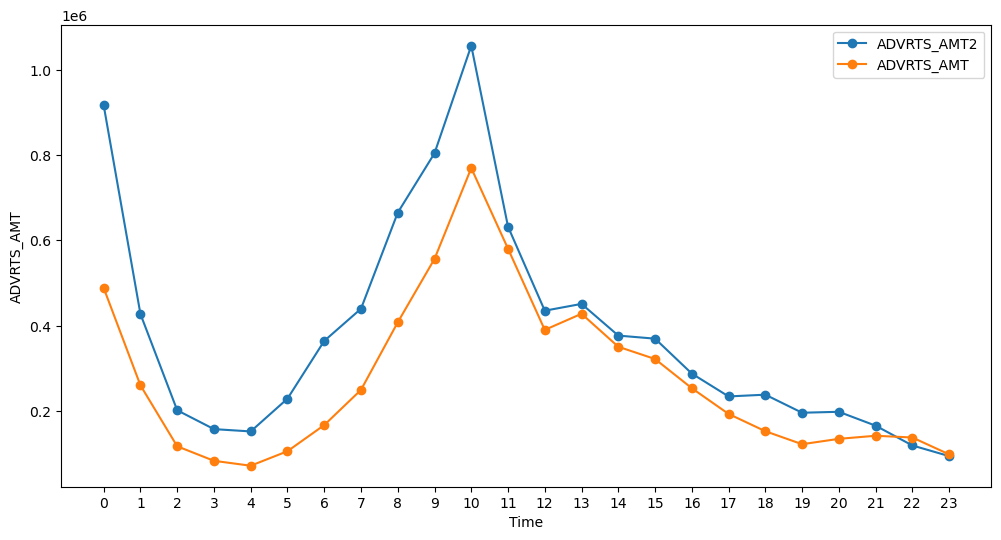

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(after_hh[['ADVRTS_AMT2', 'ADVRTS_AMT']], marker='o')
plt.xticks(np.arange(24))
plt.xlabel('Time')
plt.ylabel('ADVRTS_AMT')
plt.legend(['ADVRTS_AMT2', 'ADVRTS_AMT'])
plt.show()


In [ ]:
# 파괴 이전 데이터로 가중치 사용 전의 roas 계산


after_hh['roas2'] = (after_hh['ORDER_AMT'] / after_hh['ADVRTS_AMT']) * after_hh['ORDER_RATIO_weight']
